more detailed look at daily air quality data

In [77]:
import os

import pandas as pd

from air_brain.data.get_data import DATA_DIR

filename = os.path.join(DATA_DIR, "daily_air_quality.csv")

In [78]:
df = pd.read_csv(filename)
df.date = pd.to_datetime(df.date)
df.head(1)

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN


In [79]:
# which sites have which parameters?
pd.crosstab(df.site, df.parameter)

parameter,CO,NO2,NO2_200,NO2_500,OZONE,PM10,PM10B,PM10_640,PM25,PM25(2),PM25B,PM25T,PM25_640,SO2
site,,,,,,,,,,,,,,
Avalon,0,0,0,0,0,0,0,0,0,0,0,2141,888,1766
Clairton,0,0,0,0,0,0,0,0,0,0,0,0,968,329
Flag Plaza,1763,0,0,0,0,2239,0,0,0,0,0,0,0,0
Glassport High Street,0,0,0,0,0,3229,0,0,0,0,0,0,0,0
Harrison Township,0,3018,93,91,3110,0,0,0,0,0,0,0,0,0
Lawrenceville,0,0,0,0,3214,0,0,0,0,0,1539,18,0,0
Lawrenceville 2,3239,0,0,0,0,0,0,0,0,0,0,0,0,3221
Liberty,0,0,0,0,0,0,0,0,0,0,0,0,0,3251
Liberty 2,0,0,0,0,0,2756,0,457,0,655,0,2051,452,0


In [80]:
# how often air there health advisories, and from what parameters?
pd.crosstab(df.parameter, df.health_advisory)

health_advisory,"Active children and adults, and people with respiratory disease, such as asthma, should reduce prolonged or heavy outdoor exertion.",People with asthma should consider limiting outdoor exertion.,"People with heart or lung disease, older adults, and children should avoid all physical activity outdoors. Everyone else should avoid prolonged or heavy exertion.","People with heart or lung disease, older adults, and children should avoid prolonged or heavy exertion; everyone else should reduce prolonged or heavy exertion.","People with heart or lung disease, older adults, and children should reduce prolonged or heavy exertion.",Unusually sensitive people should consider reducing prolonged or heavy exertion.,Unusually sensitive people should consider reducing prolonged or heavy outdoor exertion.
parameter,,,,,,,
OZONE,28,0,0,0,0,0,585
PM10,0,0,0,0,0,110,0
PM10B,0,0,0,0,0,60,0
PM10_640,0,0,0,0,4,10,0
PM25,0,0,0,1,23,737,0
PM25(2),0,0,0,0,7,221,0
PM25B,0,0,0,0,0,498,0
PM25T,0,0,0,9,47,2027,0
PM25_640,0,0,2,8,14,1319,0


## PM 2.5

array([[<Axes: title={'center': 'PM25'}>,
        <Axes: title={'center': 'PM25(2)'}>],
       [<Axes: title={'center': 'PM25B'}>,
        <Axes: title={'center': 'PM25T'}>],
       [<Axes: title={'center': 'PM25_640'}>, <Axes: >]], dtype=object)

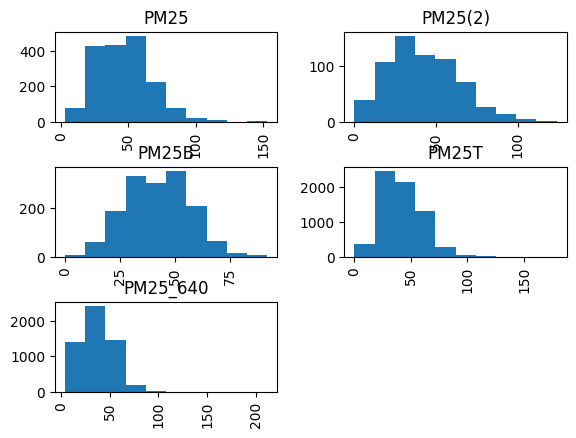

In [81]:
pm25 = df.loc[df.parameter.isin(['PM25', 'PM25(2)', 'PM25B', 'PM25T', 'PM25_640'])].copy()
pm25.hist('index_value', by='parameter')

array([[<Axes: title={'center': 'Avalon'}>,
        <Axes: title={'center': 'Clairton'}>,
        <Axes: title={'center': 'Lawrenceville'}>],
       [<Axes: title={'center': 'Liberty 2'}>,
        <Axes: title={'center': 'Lincoln'}>,
        <Axes: title={'center': 'North Braddock'}>],
       [<Axes: title={'center': 'Parkway East'}>,
        <Axes: title={'center': 'Pittsburgh'}>, <Axes: >]], dtype=object)

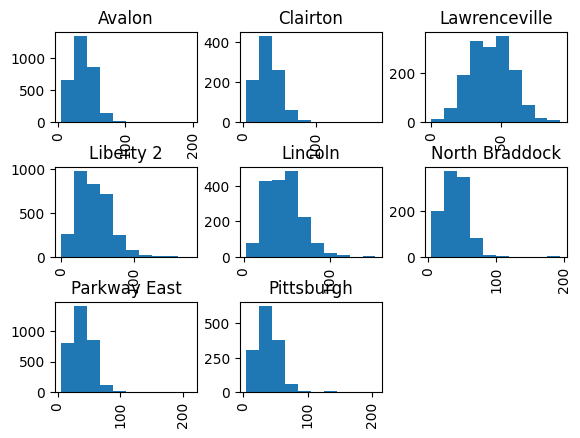

In [82]:
pm25.hist('index_value', by='site')

In [83]:
pm25['site_param'] = pm25.site + '_' + pm25.parameter
by_date = pm25.pivot(index='date', columns=['site', 'parameter'], values='index_value')
by_date['mean_pm25'] = by_date.mean(axis=1)
by_date['median_pm25'] = by_date.median(axis=1)
by_date

site,Lawrenceville,Lincoln,Liberty 2,Parkway East,Avalon,Liberty 2,Pittsburgh,Lawrenceville,North Braddock,Clairton,Avalon,Parkway East,Liberty 2,mean_pm25,median_pm25
parameter,PM25B,PM25,PM25(2),PM25T,PM25T,PM25T,PM25_640,PM25T,PM25_640,PM25_640,PM25_640,PM25_640,PM25_640,,
date,,,,,,,,,,,,,,,
2016-01-01,25.0,35.0,28.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.500000,29.500000
2016-01-02,40.0,52.0,42.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.250000,42.000000
2016-01-03,35.0,38.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,36.000000
2016-01-04,20.0,15.0,22.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.750000,18.750000
2016-01-05,54.0,49.0,44.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.250000,48.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-23,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,9.0,8.0,9.0,13.0,8.0,9.333333,9.000000
2024-11-24,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,37.0,33.0,41.0,34.0,34.0,36.333333,36.333333


In [84]:
# is there ever multiple PM 2.5 parameter types at the same location on the same day?
# no, so we're always just looking at multiple locations, with different measurement devices
for site in pm25.site.unique():
    subset = by_date[site]
    notna = subset.notna().sum(axis=1)
    subsubset = subset.loc[notna > 1]
    if len(subsubset) > 0: print(site)

In [85]:
by_date_loc = pm25.pivot(index='date', columns='site', values='index_value')
#by_date_loc['mean_pm25'] = by_date_loc.mean(axis=1)
#by_date_loc['median_pm25'] = by_date_loc.median(axis=1)
by_date_loc

site,Avalon,Clairton,Lawrenceville,Liberty 2,Lincoln,North Braddock,Parkway East,Pittsburgh
date,,,,,,,,
2016-01-01,NaN,NaN,25.0,28.0,35.0,NaN,30.0,NaN
2016-01-02,NaN,NaN,40.0,42.0,52.0,NaN,39.0,NaN
2016-01-03,NaN,NaN,35.0,33.0,38.0,NaN,38.0,NaN
2016-01-04,NaN,NaN,20.0,22.0,15.0,NaN,18.0,NaN
2016-01-05,NaN,NaN,54.0,44.0,49.0,NaN,46.0,NaN
...,...,...,...,...,...,...,...,...
2024-11-23,9.0,8.0,NaN,8.0,NaN,9.0,13.0,9.0
2024-11-24,41.0,33.0,NaN,34.0,NaN,37.0,34.0,39.0
2024-11-25,55.0,80.0,NaN,62.0,NaN,58.0,49.0,54.0


In [86]:
# is there every Lawrenceville data and Pittsburgh data at the same time for PM 2.5?
# based on Allegheny County air quality website, I think those are the same location for PM2.5
# https://www.alleghenycounty.us/Services/Health-Department/Air-Quality
#
# ... yes for 2 weeks in 2021 HMMMMMM
# need to ask the data source about this
subset = by_date_loc[['Lawrenceville', 'Pittsburgh']]
notna = subset.notna().sum(axis=1)
subsubset = subset.loc[notna > 1]
len(subsubset)

13

<Axes: xlabel='date'>

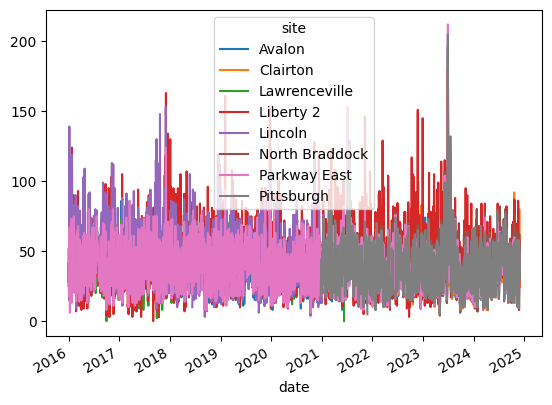

In [87]:
# location makes a difference!
# but arrest data is just for Pittsburgh anyway, not all of Allegheny county
by_date_loc.plot()

<Axes: xlabel='date'>

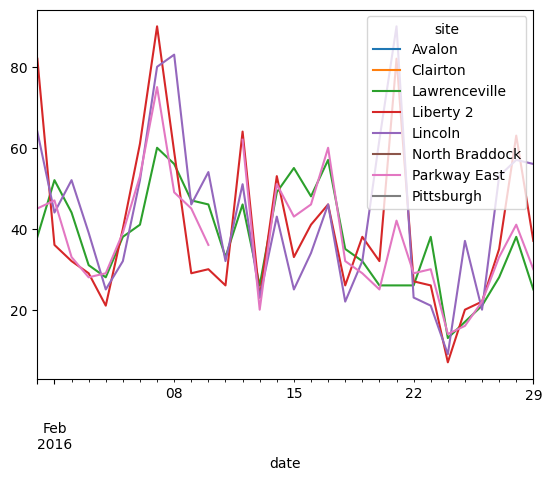

In [92]:
# zoom in to try to see cycles of variation
subset = by_date_loc.iloc[30:60]
subset.plot()

## sensor locations

In [93]:
sens = pd.read_csv(os.path.join(DATA_DIR, "air_sensors.csv"))
sens

,_id,site_name,description,air_now_mnemonic,address,latitude,longitude,enabled
0,610017,Fulton St. Fridge,Sample Fridge at 836 Fulton St. Room 117,NaN,"836 Fulton Street Pittsburgh, PA 15233",NaN,NaN,t
1,610018,Harrison Township,Harrison Township Ozone and NO/NOx Site,HT1,Highlands Senior High School - 1500 Pacific Av...,40.613864,-79.729569,t
2,610019,South Fayette,South Fayette Ozone Site,SF1,South Fayette Elementary School - 3640 Old Oak...,40.375647,-80.169931,t
3,610020,Lawrenceville,"Lawrenceville Ozone, and Met Site",LV1,Allegheny County Health Department - 301 39th ...,40.465433,-79.960742,t
4,610021,Liberty,Liberty Borough South Allegheny High School Site,NaN,South Allegheny High School - 2743 Washington ...,40.323856,-79.868064,t
5,610022,West Allegheny,West Allegheny H2S Site,NaN,NaN,40.444747,-80.267303,f
6,610023,Avalon,Avalon PM-2.5 Site,NaN,"520 Orchard Street Pittsburgh, PA 15202",40.499789,-80.071347,t
7,610024,Lawrenceville 2,LV2 NCORE site,NaN,Allegheny County Health Department - 01 39th S...,40.465433,-79.960742,t
8,610025,Monroeville,PM-10 BAM Site,NaN,NaN,40.450117,-79.770961,f
9,610026,North Braddock,PM-10 BAM Site,NB,North Braddock Borough Building - 600 Anderson...,40.402267,-79.860942,t
